In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
!pip install yfinance


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454504,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362818,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [6]:
ma100=df.Close.rolling(100).mean()
ma100

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,59.201075
2019-12-24,59.401700
2019-12-26,59.643125


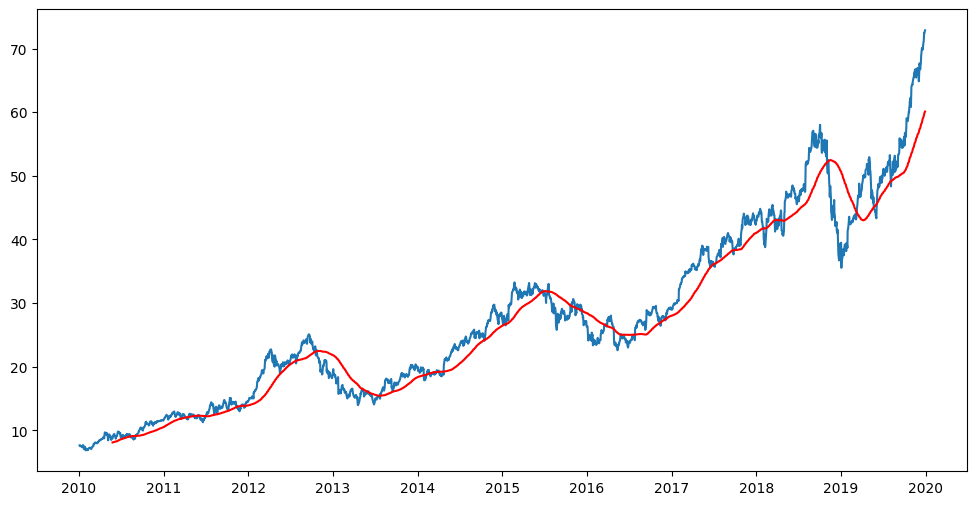

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200=df.Close.rolling(200).mean()
ma200

,Close
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,NaN
...,...
2019-12-23,54.132313
2019-12-24,54.261513
2019-12-26,54.396763


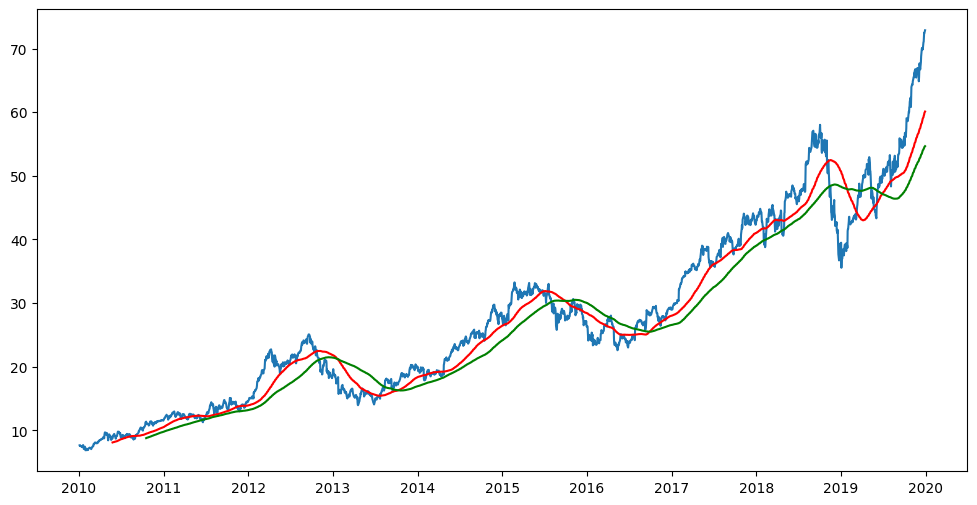

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(2515, 6)

In [12]:
#Splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [13]:
data_training.head()

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [14]:
data_testing.head()

,Close
Date,
2016-12-29,29.182501
2016-12-30,28.955000
2017-01-03,29.037500
2017-01-04,29.004999
2017-01-05,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [18]:
data_training_array.shape

(1760, 1)

In [21]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
  x_train.append([data_training_array[i-100:i]])
  y_train.append([data_training_array[i,0]])

x_train, y_train=np.array(x_train),np.array(y_train)

In [22]:
x_train.shape

(1660, 1, 100, 1)

In [26]:
#ML model

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [32]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 1, 50)               │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 1, 60)               │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 60)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 1, 80)               │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 80)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,561 (775.63 KB)

 Trainable params: 198,561 (775.63 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.2558
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0256
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0204
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0149
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0126
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0113
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0108
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0106
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0100
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0095
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0093
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0087
Epoch 16/50
52/52 

In [35]:
model.save('my_model.keras')

In [36]:
data_testing.head()

,Close
Date,
2016-12-29,29.182501
2016-12-30,28.955000
2017-01-03,29.037500
2017-01-04,29.004999
2017-01-05,29.152500


In [37]:
data_training.tail(100)

,Close
Date,
2016-08-08,27.092501
2016-08-09,27.202499
2016-08-10,27.000000
2016-08-11,26.982500
2016-08-12,27.045000
...,...
2016-12-21,29.264999
2016-12-22,29.072500
2016-12-23,29.129999


In [38]:
past_100_days=data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [42]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [43]:
input_data.shape

(855, 1)

In [48]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append([input_data[i-100:i]])
  y_test.append([input_data[i,0]])

x_test, y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 1, 100, 1)
(755, 1)


In [49]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [50]:
y_predicted.shape

(755, 1)

In [51]:
y_test

array([[0.0721907 ],
       [0.06736028],
       [0.06911197],
       [0.06842189],
       [0.07155371],
       [0.07845431],
       [0.08418707],
       [0.08482406],
       [0.08822126],
       [0.08556719],
       [0.08445249],
       [0.0895483 ],
       [0.0894952 ],
       [0.0883805 ],
       [0.0895483 ],
       [0.08997296],
       [0.08938906],
       [0.09952758],
       [0.0998461 ],
       [0.09989915],
       [0.09820055],
       [0.09671427],
       [0.1359945 ],
       [0.1348267 ],
       [0.1377462 ],
       [0.144169  ],
       [0.15075112],
       [0.15345824],
       [0.15547536],
       [0.1538829 ],
       [0.16009341],
       [0.16927655],
       [0.17187748],
       [0.17102824],
       [0.17299223],
       [0.17819418],
       [0.18037053],
       [0.1772918 ],
       [0.17798189],
       [0.17941503],
       [0.17973358],
       [0.1945963 ],
       [0.19019062],
       [0.19454325],
       [0.19220766],
       [0.19316316],
       [0.19040291],
       [0.188

In [52]:
y_predicted

array([[0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.1987079 ],
       [0.19871128],
       [0.19872221],
       [0.1987371 ],
       [0.19876099],
       [0.19880308],
       [0.19883898],
       [0.19898655],
       [0.19918057],
       [0.1993378 ],
       [0.19953619],
       [0.19973037],
       [0.200

In [53]:
scaler.scale_

array([0.02123255])

In [54]:
scale_factor=1/0.02123255
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

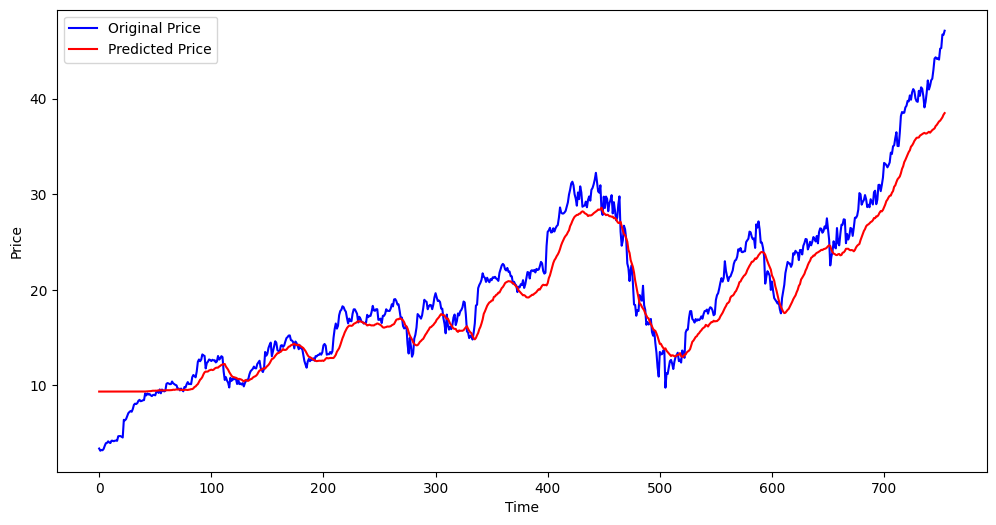

In [56]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()